In [1]:
# import required packages and modules
import os
import sys
import json
import pandas as pd
import numpy as np
from IPython.display import display, HTML

scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../../scripts/scripts_for_report'))
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

from holos_comparison import get_potato_comparison, get_soybean_comparison, plot_comparisons
from plotting_functions import plot_boxplot, plot_by_province, plot_by_eco_id, plot_by_crop
from sensitivity_analysis_sample_case import get_or_create_data_file

# Executive summary
In collaboration with LiteFarm, we developed PyHolos, a Python-based model designed to enhance greenhouse gas emissions calculations, specifically for nitrous oxide. PyHolos can integrate into the existing LiteFarm framework. It further incorporates external data sources and allows for user-defined parameter ranges, offering improvements over the original Holos model. This tool not only provides farmers with emissions estimates for informed decision-making, but also assists researchers in uncertainty analysis for parameters and regions with significant data variability. Although robust, PyHolos has shown minor discrepancies in emission estimates compared to the original Holos software. To refine these calculations, we recommend ongoing communication with the Holos team for continuous improvement.

# Introduction
Climate change presents a major challenge for our planet, with agriculture significantly contributing to greenhouse gas (GHG) emissions through activities such as livestock farming, fertilizer application, and land management practices [@johnson2007agricultural]. Farmers are central to addressing this challenge, as their choices in crop selection and farming practices directly impact carbon emissions  [@jantke2020agricultural]. Agricultural choices are influenced by immediate profits, long-term soil health, and the financial benefits of conservation and sustainability programs. Carbon credits, for example, offers farmers the opportunity to earn extra revenue by adopting practices that reduce carbon emissions [@barbato2023farmer]. However, farmers currently lack scientific support to balance losses from less profitable crops against potential gains from carbon credits.  

Addressing the need for better decision-making support, the LiteFarm team is developing research-based innovative tools to help farmers balance financial and environmental benefits. The LiteFarm team consists of experts in research and development who are committed to providing tools that transform data into actionable insights for sustainability. They have developed an application that helps farmers manage their daily operations, boosting their income while also encouraging environmentally friendly practices. In the next phase, the team plans to enhance the app by integrating greenhouse gas (GHG) emissions calculations to further support sustainable farming decisions.  

Selecting a suitable GHG emissions calculation model is crucial for this task. The Holos GHG emissions calculator was chosen model since it is open-source and has been endorsed by the Canadian government [@Holos2022]. Holos is a dependable, cost-free alternative to commercial models. Nonetheless, this model has limitations: it operates as a standalone tool and cannot be directly integrated with the LiteFarm framework. Holos runs exclusively on Windows OS and is developed in C#, restricting its wider usability. Additionally, its fixed parameters limit the model's flexibility and adaptability in incorporating data from new or alternative sources.  

Our project aims to integrate the Holos GHG emission calculation module into the LiteFarm framework, focusing on nitrous oxide ($N_2O$) emissions from crop residue. We enhance the existing Holos model to better align with our partner’s needs. Our objectives are:  

(1) **Model Reconstruction**: We aim to rebuild the Holos model in Python for smoother integration with the LiteFarm application. This shift ensures better compatibility with the app’s existing framework and offers more accessibility than the original Holos software.

(2) **Enhanced Flexibility**: We aim to enhance the Holos model for parameter sampling from external data sources and user-defined distributions. This adjustment increases flexibility in model parameterization, adapting to diverse global agricultural environments. Including external data fits our partner’s global research scope and mitigates data scarcity in under-researched regions.

(3) **Improving Reliability through Sensitivity Analysis**: With the enhanced model, we conduct sensitivity analyses to understand how input variations affect GHG emission estimates. This process is vital for identifying and minimizing uncertainties, thereby helping researchers pinpoint research gaps and provide farmers with accurate, reliable data for informed decision-making.

# Data science methods  

## Model development: PyHolos  

We developed the PyHolos model to calculate nitrous oxide emissions from crop residues. After thoroughly reviewing the original Holos model code and technical reports, we identified equations with 23 parameters required for calculation (see details in Appendix [8.1](#Parameters-N2O-Calculation) and [8.2](#Equations-N2O-Calculation)).  

### Model Reconstruction  

To replicate the original Holos outputs, we developed a Python-based version of the model, named PyHolos. This model consists of two key components: a Data Loader and a Calculator. During development, each component is divided into into smaller, manageable steps to improve the model's structure and functionality. The Data Loader imports parameters by organizing them into specific categories, while the Calculator processes these values in sequential steps. This modular approach not only facilitates the storage of intermediate results but also enables validation of the calculation results against the original Holos outputs (@fig-structure-conceptual). We utilized non-standard Python packages 'requests' for handling HTTP requests and 'shapely' for geometric operations for obtaining external soil and climate data [@shapely2024;@requests2024].



::: {#fig-structure-conceptual}
<embed src="../../img/PyHolos-structure-conceptual.svg" type="image/svg+xml" style="width: 100%; height: auto;"/>

PyHolos Model Architecture. This diagram outlines the PyHolos workflow where the Data Loader retrieves predefined Holos parameters from CSV files or pulls in external data as required by users. Parameters are systematically categorized into five groups: farm, crop, crop-group, climate and soil, and modifiers (see Appendix [8.1](#Parameters-N2O-Calculation)). The Calculator component subsequently processes these parameters to perform calculations on crop residue, emission factors, and total $N_2O$ emissions.
:::

### Enhanced Flexibility  

While PyHolos uses Holos’s original fixed parameters for standard operations, we also enhanced its flexibility. We have added modules that retrieve external data, supporting advanced analytical methods such as bootstrapping and sampling (@fig-structure-conceptual).   

For climate parameters, we use API calls to access the National Aeronautics and Space Administration/Prediction of World Wide Energy Resources (NASA/POWER; http://power.larc.nasa.gov), and for soil data, we use the Harmonized World Soil Database [@nachtergaele2023harmonized]. These enhancements offer global coverage and refined data resolution, boosting the model’s accuracy and relevance.   

Additionally, we have introduced customizable modules for setting crop and modifier parameters. This flexibility allows users with domain knowledge to tailor these parameters to their research needs.


## Analysis  

### Validation of PyHolos Outputs  

To validate PyHolos’ accuracy, we compared its outputs with those of the original Holos software, using identical input parameters across various crops and multiple yield scenarios.   

### Sensitivity Analysis Using PyHolos  

We conducted a sensitivity analysis using a hypothetical dataset of 105 farms, each growing three different crop types. For each crop at each farm, we generated 100 samples for each parameter to assess how different parameters affect the model's $N_2O$ estimations.  

Unlike the original Holos model, which uses average climate and soil parameters from broad regions known as ecodistricts, PyHolos samples point-specific data from each farm's corresponding ecodistrict. This approach assesses uncertainties associated with the Holos model and provides a detailed view of how environmental factors affect calculation. For other fixed variables in Holos where domain knowledge is lacking, we varied parameters by ±25% using a uniform distribution.   


# Data product and results  

## Data product - PyHolos  

The PyHolos model uses predefined parameters to replicate original Holos outputs and incorporates user-defined variables along with external climate and soil data for greater flexibility (@fig-structure-simplified). It calculates direct $N_2O$ emissions from crop residue in two modes: Farmer Mode and Scientific Mode. The PyHolos program is operated via command line, allowing users to specify the desired mode—Farmer or Scientific—and configure simulations and other settings. 


::: {#fig-structure-simplified}
<embed src="../../img/PyHolos-structure-simplified.svg" type="image/svg+xml" style="width: 100%; height: auto;"/>

PyHolos Model Structure Overview. This diagram illustrates how PyHolos handles data management and processing. The Data Loader (gray shaded area) imports Holos parameters from CSV files or retrieves external data. The Calculator (light-yellow shaded area) computes crop residue, emission factors, and total $N_2O$ emissions. The data loader manages farm, crop, crop-group, climate and soil, and modifiers across five modules (blue boxes), which also integrate external climate and soil data and user-defined parameter distributions (purple boxes). Green boxes represent modules with supporting classes and functions. Salmon-colored boxes represent modules/classes invoked by `main.py`. Supporting scripts for defining parameter distribution and batch processing are stored under `scripts/` on our GitHub repository (yellow boxes). Thick gray-blue arrows depict main data flows, black solid lines show module interactions, and black dashed lines indicate farm data usage across modules. Each box includes a hyperlink to its module, class, or script on GitHub. Refer to the
<a href="https://github.com/yhan178/LiteFarm-MDS-Capstone/blob/main/img/PyHolos-structure-full.svg" target="_blank">complete diagram</a> for detailed class attributes and methods.
:::

### Model reconstruction: Farmer Mode   

Farmer Mode delivers a single, definitive output, ideal for users seeking straightforward estimates, such as actual farmer users. When utilizing default Holos parameters, this mode aims to replicates the original Holos results using identical inputs such as farm location, crop type, yield, and area. Additionally, Farmer Mode supports the incorporation of external data to override standard Holos parameters, offering enhanced flexibility. For example, LiteFarm researchers can input their own research data or apply more precise parameters values to refine the estimation. The results are formatted in JSON as a simple dictionary.   

### Enhanced flexibility: Scientific Mode   

Scientific Mode runs simulations by sampling across parameter distributions, generating multiple outputs per parameter. This mode is suitable for users conducting in-depth analyses. Results are formatted in JSON as nested dictionaries to accommodate multiple simulation results per parameter.   

A key application of this mode is predicting and understanding emissions extremes and trends. For instance, the integrated external climate data source captures real-time changes, enabling temporal analyses that track emissions trends over time. 


## Results

### PyHolos model validation

We compared the calculation outputs of PyHolos and Holos for two crop types: potatoes (a root crop) and soybeans (an annual crop). These two crop types use different $N_2O$ calculation equations and parameter values (see details in Appendix [8.1](#Parameters-N2O-Calculation) and [8.2](#Equations-N2O-Calculation)). While Holos software provides some intermediate results for crop residue calculation, aiding in comparison, it lacks intermediate data on emission factor calculation, hindering identification of sources of discrepancies in this aspect of the calculation (see components in the "calculator" module in @fig-structure-simplified).

For potatoes, PyHolos accurately replicates Holos' results for above and below-ground carbon inputs (@tbl-comparison-potatoes). However, there are minor differences in nitrogen from crop residues (@tbl-comparison-potatoes). The discrepancies become larger in the final $N_2O$ emissions, calculated by multiplying the nitrogen from crop residues by the emission factor (@tbl-comparison-potatoes). The origins of these discrepancies are unclear. According to equation 2.5.6-9 in Holos model (also see Appendix [8.2.1 Total Crop Residues](#total-crop-residues)), nitrogen from crop residues should equal the sum of above and below-ground inputs multiplied by farm area, as calculated by PyHolos. Yet, Holos results suggest undocumented adjustments in how farm area data is used in calculation. Furthermore, the enlarged discrepancies in final $N_2O$ emissions indicate differences in emission factor calculations. However, the absence of intermediate results from Holos in emission factor calculations hinders tracing the sources of these discrepancies.


In [2]:
#| label: tbl-comparison-potatoes
#| tbl-cap: Results comparison between Holos and PyHolos for potatoes (a root crop) across different yields. 

potato_comparison = get_potato_comparison()
html_table_1 = potato_comparison.to_html(index=False)
HTML(html_table_1)

Source,Crop,Yield,Aboveground Carbon Input,Belowground Carbon Input,N2O-N From Crop Residues,N2O Direct CO2e
Holos Software,Potatoes,10000,365.32,15.28,0.90,521.08
Holos Software,Potatoes,30000,1095.96,45.86,2.70,1293.98
Holos Software,Potatoes,50000,1826.60,76.43,4.50,2066.88
PyHolos,Potatoes,10000,365.32,15.29,0.83,354.47
PyHolos,Potatoes,30000,1095.96,45.86,2.48,1063.40
PyHolos,Potatoes,50000,1826.60,76.43,4.13,1772.34


Unlike potatoes, which exhibit consistent above- and below-ground input estimations between PyHolos and Holos, soybeans show discrepancies across all parameters: above- and below-ground inputs, nitrogen from crop residues, and final $N_2O$ emissions (@tbl-comparison-soybeans). Besides the previously noted discrepancies in farm area usage and emission factor calculations, the sources of other discrepancies remain elusive. The Holos technical report indicates a linear relationship between crop yield and $N_2O$ emissions, a pattern observed in root crops like potatoes (@tbl-comparison-potatoes and @fig-comparison-holos). However, Holos' outputs for soybeans do not demonstrate this linearity. This inconsistency may stem from ongoing updates and developments in the Holos software, which may not be fully documented.

In [3]:
#| label: tbl-comparison-soybeans
#| tbl-cap: Results comparison between Holos and PyHolos for soybeans (an annual crop) across different yields.

soybean_comparison = get_soybean_comparison()
html_table_2 = soybean_comparison.to_html(index=False)
HTML(html_table_2)

Source,Crop,Yield,Aboveground Carbon Input,Belowground Carbon Input,N2O-N From Crop Residues,N2O Direct CO2e
Holos Software,Soybeans,1000,912.77,283.75,0.47,336.12
Holos Software,Soybeans,3000,1317.41,532.97,0.75,455.35
Holos Software,Soybeans,5000,1116.49,646.55,0.74,453.66
PyHolos,Soybeans,1000,598.71,312.94,0.80,342.30
PyHolos,Soybeans,3000,1796.12,938.81,2.39,1026.90
PyHolos,Soybeans,5000,2993.53,1564.68,3.99,1711.49


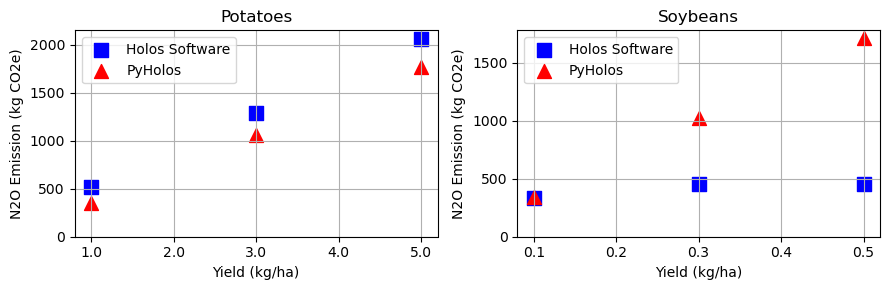

In [4]:
#| label: fig-comparison-holos
#| fig-cap: "Comparison of $N_2O$ Emission Estimates between PyHolos and Holos Software for Potatos and Soybeans across Different Yields. Blue squares represent Holos Software's estimates, and red triangles depict PyHolos' estimates. Based on current calculation equations (see Appendix [8.2](#Equations-N2O-Calculation)), emissions should linearly correlate with crop yields, as demonstrated by PyHolos. While this linear relationship is evident for potatoes with Holos Software, it does not appear for soybeans."

plot_comparisons(potato_comparison, soybean_comparison)

### Sensitivity Analysis Results

We have analyzed model outputs across various parameters for different crops and farms using PyHolos' Scientific Mode. Here we focus on soybean $N_2O$ emission estimates at a specific farm, illustrating the sensitivity of emission estimates to parameter changes (@fig-sensitivity-analysis-sample-case). Each boxplot represents the variability induced by a single parameter while keeping other parameters constant.

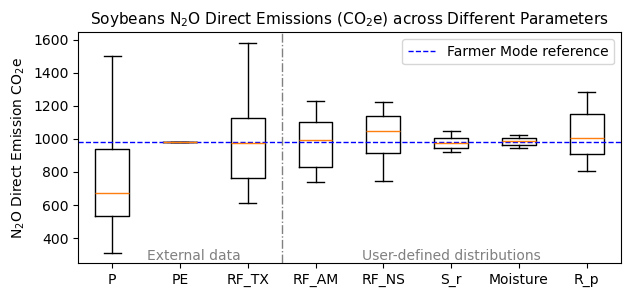

In [5]:
#| label: fig-sensitivity-analysis-sample-case
#| fig-cap: "$N_2O$ Direct Emissions ($CO_{2}e$) across different input parameters. The blue dashed line indicates the baseline emission value under Farmer Mode. Parameters sampled using external data sources (i.e., P, PE, RF_TX) are separated by a vertical dashed line from those sampled over the default user-defined distributions (uniform distribution, +-25%; RF_AM, RF_NS, S_r, Moisture, R_p). Detailed parameter explanations can be found in @tbl-params in Appendix [8.1](#Parameters-N2O-Calculation)."

sensitivity_sample_case_json = get_or_create_data_file()
plot_boxplot(sensitivity_sample_case_json)

For parameters using external data sources, we observed a significant deviation between the Farmer Mode's definitive estimations (i.e., Farmer Mode reference) and the median value of all samples from the ecodistrict, as observed with precipitation (P) (@fig-sensitivity-analysis-sample-case). Thus, using ecodistrict averages in original Holos's method may fail to accurately represent the specific conditions of farms located at the distribution extremes. Our finding underscores the importance of considering local conditions when refining $N_2O$ emission estimates. 

For user-defined parameters, the Farmer Mode reference aligns with the median values, as the sampling distributions are default to uniform distributions with ±25% uncertainty (@fig-sensitivity-analysis-sample-case). Nonetheless, these results remain insightful. Different parameters not only vary in magnitude but are also utilized differently in the calculation process—some are used in exponential equations, others in linear equations. Therefore, even though all parameters are sampled uniformly, their impact on the final $N_2O$  estimation varies. This variability provides critical insights into how sensitive $N_2O$  emissions to parameter changes, aiding in identifying areas with large uncertainties and research gaps.


## Advantages and limitations

PyHolos enhances the original Holos model by replicating its ability to provide definitive $N_2O$ emission estimations and integrating external data sources to refine these estimates and evaluate uncertainties. Specifically, Farmer Mode aims to replicate Holos' results using its original parameters, fulfilling our partner's primary need to assist farmers with carbon emission estimations. Additionally, integrating external data enables modifying Holos' parameters, meeting our partner's needs for refined calculations with their own research data. Furthermore,  Scientific Mode supports in-depth analyses by sampling across parameter distributions. This functionality helps pinpoint and reduce uncertainties in estimations, thereby improving calculation accuracy and supporting farmers' decision-making.  

The command-line operation of PyHolos not only facilitates integration with the LifeFarm framework but also offers time efficiency compared to the manual input methods used in the Holos software. For example, in our sensitivity analysis, calculating $N_2O$ emission estimations for 105 farms, each with three crops across 100 runs, took 13 hours—primarily delayed by NASA POWER API calls. In contrast, using Holos software for the same task would require approximately 10.9 days, assuming continuous operation and with each record taking 30 seconds to complete.  

Currently, PyHolos focuses solely on estimating $N_2O$ emissions from crop residue and has not yet integrated other greenhouse gas emissions components from the Holos model. Given that Holos is still undergoing development and updates, continued efforts are necessary to fully align PyHolos with our partners' needs. PyHolos is thoroughly documented in both methodology and usage. Its modular design allows for the addition of new functions and modules as needed, setting the groundwork for continuous development.

# Conclusions and recommendations  

Our project with LiteFarm aimed to address the challenge of calculating greenhouse gas  emissions to support sustainable farming practices. We developed PyHolos, a Python-based model that not only replicates but also improves upon the original Holos model, offering $N_2O$ emission estimates from crop residues and integration with the LiteFarm framework.  

PyHolos fulfills our partner's fundamental needs for emission estimations and introduces enhancements over the original Holos model. These improvements include the integration of external or user-specific data for greater calculation accuracy and the capacity to conduct uncertainty analyses. As a result, PyHolos provides a useful tool for both farmers and researchers aiming to mitigate the environmental impact of agriculture.  

While PyHolos has proven effective in estimating $N_2O$ emissions, it currently does not encompass other types of greenhouse gas emissions, limiting its wider utility. Additionally, minor discrepancies exist between PyHolos and the Holos software, likely due to ongoing updates in Holos yet outdated documentation.  

Future development efforts of PyHolos should focus on expanding the model's capabilities to include other greenhouse gases and refining its integration with the LiteFarm application. By continuing to enhance data accuracy and model flexibility, PyHolos will further empower farmers and researchers to make data-driven decisions. We recommend maintaining collaboration with the Holos team to ensure that PyHolos aligns with requirements of the LiteFarm team in greenhouse gas emission calculation and sustainable agricultural practices.

# Acknowledgements
::: {.appendix} 

We sincerely thank our mentor, Dr. Simon Goring, for his invaluable guidance and support throughout this project. We also thank our partner, the LiteFarm team at UBC. Special thanks to Dr. Khanh Dao Duc and Professor Hannah Wittman for providing us with the opportunity to work on this project and for their support throughout this journey.

:::

# References

::: {#refs}
:::

# Appendix 

::: {.appendix}
:::

{{< include ../../docs/parameters_N2O_calculation.md >}}
: Parameters used in Holos $N_2O$ emission calculation {#tbl-params .striped}

{{< include ../../docs/equations_N2O_calculation_for_report.md >}}
